### Processamento de arquivos do OMI L3 - Algumas informações importantes

#### 1) 
O formato é o **HDF5**. Para saber os campos que ele contém use o comando gdal_info *filename.he5*

Para este projeto estamos interessados nos seguintes subcampos:

~~~
(...)
  SUBDATASET_3_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolAbsOpticalDepth354
  SUBDATASET_3_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolAbsOpticalDepth354 (32-bit floating-point)
  SUBDATASET_4_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolAbsOpticalDepth388
  SUBDATASET_4_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolAbsOpticalDepth388 (32-bit floating-point)
  SUBDATASET_5_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolAbsOpticalDepth500
  SUBDATASET_5_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolAbsOpticalDepth500 (32-bit floating-point)
  SUBDATASET_6_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolOpticalDepth354
  SUBDATASET_6_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolOpticalDepth354 (32-bit floating-point)
  SUBDATASET_7_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolOpticalDepth388
  SUBDATASET_7_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolOpticalDepth388 (32-bit floating-point)
  SUBDATASET_8_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolOpticalDepth500
  SUBDATASET_8_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolOpticalDepth500 (32-bit floating-point)
  SUBDATASET_9_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolSingleScattAlb354
  SUBDATASET_9_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolSingleScattAlb354 (32-bit floating-point)
  SUBDATASET_10_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolSingleScattAlb388
  SUBDATASET_10_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolSingleScattAlb388 (32-bit floating-point)
  SUBDATASET_11_NAME=HDF5:"OMI-Aura_L3-OMAERUVd_2019m1215_v003-2019m1217t141849.he5"://HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolSingleScattAlb500
  SUBDATASET_11_DESC=[180x360] //HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/FinalAerosolSingleScattAlb500 (32-bit floating-point)
  (...)
  ~~~

#### 2) 
Quando for usar o leitor não se deve esquecer de retirar os *underlines* do nome. O gdaltranslate converte os espaços em *underlines*


In [23]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import h5py

#### 3)
Constrói-se o grid a partir das informações nos metadados. 

Exemplo:
~~~
HDFEOS_GRIDS_OMI_Column_Amount_O3_GridSpacing=(0.25,0.25)
  HDFEOS_GRIDS_OMI_Column_Amount_O3_GridSpacingUnit=deg
  HDFEOS_GRIDS_OMI_Column_Amount_O3_GridSpan=(-180,180,-90,90)
  HDFEOS_GRIDS_OMI_Column_Amount_O3_GridSpanUnit=deg
  HDFEOS_GRIDS_OMI_Column_Amount_O3_NumberOfLatitudesInGrid=720 
  HDFEOS_GRIDS_OMI_Column_Amount_O3_NumberOfLongitudesInGrid=1440 
~~~
Em que se constrem os seguintes:

```
longitude = np.arange(0., 1440.0) * 0.25 - 180 + 0.125
latitude = np.arange(0., 720.0) * 0.25 - 90 + 0.125
```

Para os dados de aerosol e SSA:

~~~
HDFEOS_GRIDS_Aerosol_NearUV_Grid_GCTPProjectionCode=0 
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_GridOrigin=Center
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_GridSpacing=(1.0,1.0)
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_GridSpacingUnit=deg
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_GridSpan=(-180,180,-90,90)
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_GridSpanUnit=deg
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_NumberOfLatitudesInGrid=180 
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_NumberOfLongitudesInGrid=360 
  HDFEOS_GRIDS_Aerosol_NearUV_Grid_Projection=Geographic

~~~


```
longitude = np.arange(0., 360.0) * 1.0 - 180 + 0.5
latitude = np.arange(0., 180.0) * 1.0 - 90 + 0.5
```

## Parte 1: 
pré-processamento dos arquivos diários e conversão em mensais

In [24]:
# building the grid (spacing 1.0 x 1.0)

longitude = np.arange(0., 360.0) * 1.0 - 180 + 0.5
latitude = np.arange(0., 180.0) * 1.0 - 90 + 0.5

longitude = longitude.reshape(-1,360)
latitude = latitude.reshape(180,-1)

# latitude

In [25]:
# file reading: here we extract the fields we are interested: AOD,AAOD and SSA in 3 wavelengths

# FILE_NAME = '/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/july2019.he5'    

DATAFIELDS_TO_EXTRACT = ['/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolAbsOpticalDepth354',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolAbsOpticalDepth388',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolAbsOpticalDepth500',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolOpticalDepth354',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolOpticalDepth388',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolOpticalDepth500',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolSingleScattAlb354',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolSingleScattAlb388',
                         '/HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolSingleScattAlb500']

# extract files 

def XtractFilesFromHDF5L3(FILE_NAME,DATAFIELDS_TO_EXTRACT):

    
    with h5py.File(FILE_NAME, mode='r') as f:
        
        dset = f[DATAFIELDS_TO_EXTRACT]
        data = dset[:]
        
        # Have to manually create a masked array due to the fill value.
        # No need to scale the data, as the scale factor and add offset are
        # 1.0 and 0.0 respectively.
        data[data == dset.fillvalue] = np.nan
        data = np.ma.masked_where(np.isnan(data), data)
                
        # Get attributes needed for the plot.
        # String attributes actually come in as the bytes type and should
        # be decoded to UTF-8 (python3).
        title = dset.attrs['Title'].decode()
        units = dset.attrs['Units'].decode()
        # print('Extracting: ', DATAFIELDS_TO_EXTRACT)
        # print(np.nansum(data))
        # print(title,units)
    return data

# aaod354 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[0])
# aaod388 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[1])
# aaod500 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[2])

# aod354 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[3])
# aod388 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[4])
# aod500 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[5])

# ssa354 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[6])
# ssa388 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[7])
# ssa500 = XtractFilesFromHDF5L3(FILE_NAME, DATAFIELDS_TO_EXTRACT[8])

# ssa500.size

Montando o banco de dados com lat,long e a quantidade medida em cada uma das colunas.

TODO LIST
- [X] Construir a matriz
- [X] Fazer o loop e adicionar todas as variveis de estudo
- [X] Converter para (geo)pandas
- [X] Fazer os shapefiles
- [X] Loops e consolidacao mensal

Note que os códigos comentados podem ainda ser usados quando se for processar um arquivo individual

In [26]:
# redimension matrices of lat and long to match values

lon = np.repeat(longitude,180,axis=0)
lat = np.repeat(latitude,360,axis=1)

# # Option 1: separate per measurement
# aaod = np.array([lat.reshape(-1),
#                     lon.reshape(-1),
#                     aaod354.reshape(-1),
#                     aaod388.reshape(-1),
#                     aaod500.reshape(-1)]).transpose()

# aod = np.array([lat.reshape(-1),
#                     lon.reshape(-1),
#                     aod354.reshape(-1),
#                     aod388.reshape(-1),
#                     aod500.reshape(-1)]).transpose()

# ssa = np.array([lat.reshape(-1),
#                     lon.reshape(-1),
#                     ssa354.reshape(-1),
#                     ssa388.reshape(-1),
#                     ssa500.reshape(-1)]).transpose()

# Option 2: consolidated

# aerosol = np.array([lat.reshape(-1),
#                     lon.reshape(-1),
#                     aod354.reshape(-1),
#                     aod388.reshape(-1),
#                     aod500.reshape(-1),
#                     aaod354.reshape(-1),
#                     aaod388.reshape(-1),
#                     aaod500.reshape(-1),
#                     ssa354.reshape(-1),
#                     ssa388.reshape(-1),
#                     ssa500.reshape(-1)]).transpose()

# aerosol
 
# # check
# np.nansum(aaod,axis=0) 

In [5]:
# converting to dataframe


import pandas as pd

# # option 1 : separate files for each measurement
# aod_df = pd.DataFrame(aod, columns = ['lat','lon','aod354','aod388','aod500']).dropna()
# aaod_df = pd.DataFrame(aaod, columns = ['lat','lon','aaod354','aaod388','aaod500']).dropna()
# ssa_df = pd.DataFrame(ssa, columns = ['lat','lon','ssa354','ssa388','ssa500']).dropna()

# # option 2 : consolidated
# aerosol_db = pd.DataFrame(aerosol, columns = ['lat','lon','aod354','aod388','aod500',
#                                                       'aaod354','aaod388','aaod500',
#                                                       'ssa354','ssa388','ssa500' ]).dropna()
# print(aerosol_db)
# print(type(aod_df))

In [27]:
# optional: filter to a square covering South America
# note that I filtered the pandas not the geopandas as
# in previous scripts. Doesn't matter the order...

def filterLATAM(my_dataframe):

 
    min_lat = -57.5858
    max_lat =  15.5988
    min_lon = -85.8360
    max_lon = -35.8750

    # back to original nomenclature
    tmp = my_dataframe.copy()
    lat_filter = (tmp["lat"] >= min_lat) & (tmp["lat"] <= max_lat)
    lon_filter = (tmp["lon"] >= min_lon) & (tmp["lon"] <= max_lon)

    # tmp = tmp.loc[lat_filter & lon_filter]  
    return tmp[lat_filter & lon_filter]

# filtered_df = filterLATAM(aerosol_db)
# print(len(filtered_df), len(aerosol_db))



In [7]:
# my_path = '/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/'
# file_pattern = my_path + str(yr) + '/OMI-Aura_L3-OMAERUVd_' + str(yr) +'m' + mon
# my_path2 = my_path + '2019/'
# print(my_path + '2019/')
# glob.glob(my_path2 + 'OMI-Aura_L3-OMAERUVd_2019' +'/*.he5')

In [8]:
# filename = 'OMI-Aura_L3-OMAERUVd_2021m1230_v003-2022m0101t231235.he5'

# mon = filename[26:28]
# day = filename[28:30]

# print(mon,day)
# len(my_path)

In [22]:
list(range(2019,2022))

[2019, 2020, 2021]

In [28]:
# monthly loop
# we will build a pandas with the monthly values and save
# them 

# (minor change processing the missing files)

import glob
import pandas as pd

year = list(range(2019,2022))
month = ['01','02','03','04','05','06',
         '07','08','09','10','11','12']
# empty dataframe
df = pd.DataFrame(columns = ['lat','lon','aod354','aod388','aod500',
                                                      'aaod354','aaod388','aaod500',
                                                      'ssa354','ssa388','ssa500','day','month','year'])
for yr in year:
    my_path = '/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/'
    my_path = my_path + str(yr) + '/'
    print('Processing', my_path,'directory files')

    for filename in glob.glob(my_path +'/*.he5'):
        # get month 

        mon = filename[78:80]
        day = filename[80:82]

        # print(day,mon)
    # for filename in glob.glob()
        
        try:
             
            aaod354 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[0])
            aaod388 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[1])
            aaod500 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[2])

            aod354 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[3])
            aod388 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[4])
            aod500 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[5])

            ssa354 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[6])
            ssa388 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[7])
            ssa500 = XtractFilesFromHDF5L3(filename, DATAFIELDS_TO_EXTRACT[8])
            # print('Processed ', filename) 

        except:
            print('Could not open file or file does not exist')
        aerosol = np.array([lat.reshape(-1),
                    lon.reshape(-1),
                    aod354.reshape(-1),
                    aod388.reshape(-1),
                    aod500.reshape(-1),
                    aaod354.reshape(-1),
                    aaod388.reshape(-1),
                    aaod500.reshape(-1),
                    ssa354.reshape(-1),
                    ssa388.reshape(-1),
                    ssa500.reshape(-1)]).transpose()
        

        aerosol_db = pd.DataFrame(aerosol, columns = ['lat','lon','aod354','aod388','aod500',
                                                      'aaod354','aaod388','aaod500',
                                                      'ssa354','ssa388','ssa500' ]).dropna()
        aerosol_db['day'] = day
        aerosol_db['month'] = mon
        aerosol_db['year'] = yr  

        filtered_df = filterLATAM(aerosol_db)

        df = pd.concat([df,filtered_df])
        
        

Processing /home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/2019/ directory files
Processing /home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/2020/ directory files
Processing /home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/2021/ directory files


Arquivo csv com as coordenadas e as colunas com as medidas de aerossol diárias.

TODO: 

[X] Consolidar pela média mensal

[ONGO] Gerar os arquivos mensais (shapefiles) 

[ ] Subir para o FTP server do *floresta*

[] Descobrir por que não processou os anos de 2020 e 2021
(provavelmente estourou o máximo de linhas permitidas no Pandas)

In [29]:
df.to_csv('/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/aerosol_data_2019.csv')

## Parte 2: processamento do csv consolidado e geração dos shapefiles

In [35]:
# reading csv from a local drive 
import pandas as pd

# df = pd.read_csv('C:\\Users\\mteix\\Desktop\\aerosol_data.csv', low_memory=False)
df = pd.read_csv('/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/aerosol_data.csv', low_memory=False)

In [36]:
# tide up!!

df2 = df.dropna()
cols = df2.columns.to_list()
cols
df = df2[[  'day', 'month', 'year',
            'lat','lon',
            'aod354', 'aod388', 'aod500',
            'aaod354','aaod388','aaod500',
            'ssa354','ssa388','ssa500']]

df2 = None
# no idea why this column is an object 
df['aaod500'] = df['aaod500'].astype(float, errors = 'raise')

# groupby([cols_to_group_by])
#         [[cols_with_aggregates]]
#          .aggregation_stat()
df_means = df.groupby(['month','year','lat', 'lon',])[['aod354', 'aod388', 'aod500',
            'aaod354','aaod388','aaod500',
            'ssa354','ssa388','ssa500']].mean().reset_index()



In [37]:
# this function takes the dataframe from previous step and creates the shapefiles
# -------- always verify the buffer !!!!! ---------------


def ToGPDAndToSHP(my_dataframe,my_year,my_month):
    from shapely.geometry import Polygon, Point, MultiPolygon
    import geopandas as gpd
    crs = {'init':'EPSG:4326'}
    geometry = [Point(xy) for xy in zip(my_dataframe['lon'], my_dataframe['lat'])]

    points = gpd.GeoDataFrame(my_dataframe, 
                            crs = crs, 
                            geometry = geometry)

    # buffers 1.0 degrees
    buffers = points.buffer(0.5) 
    bounds = buffers.bounds

    # points

    bounds['pixel_area'] = bounds.apply(
    lambda obj: Polygon(shell=[
        Point(obj['maxx'],obj['miny']),
        Point(obj['minx'],obj['miny']),
        Point(obj['minx'],obj['maxy']),
        Point(obj['maxx'],obj['maxy']),
        Point(obj['maxx'],obj['miny']),]),
    axis=1
    )

    # adding indexes to merge dataframes
    points.insert(0, 'New_ID', range(1, 1 + len(points)))
    bounds.insert(0, 'New_ID', range(1, 1 + len(bounds)))

    my_merge = bounds.merge(points, on='New_ID')

    gdf = my_merge
    gdf = gpd.GeoDataFrame(
        gdf,
        crs = {'init':'EPSG:4326'}, 
        geometry = [a for a in gdf['pixel_area']]                               
        )
    gdf = gdf.reset_index()
    gdf = gdf.loc[:,gdf.columns.isin(['aod354','aod388','aod500',
                                    'aaod354','aaod388','aaod500',
                                    'ssa354','ssa388','ssa500',
                                    'geometry'])]

    gdf.to_file('/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/shapefiles_pre2019/' + 'aero_' + str(my_year) + '_' + str(my_month) + '.shp')
    
    

In [38]:
# the loop
import geopandas as gpd 
from shapely.geometry import Polygon, Point, MultiPolygon

# sick and tired of these warnings... will turn off for now
import warnings
warnings.filterwarnings("ignore")

year = list(range(2004,2019))
month = list(range(1,13))

for yr in year:
    print('processing monthly shapefiles for ', yr)
    for mon in month:
        # query db to get the selected mon and yr average
        try: 
            my_df = df_means.query('year==' + str(yr) + '& month==' + str(mon))
            ToGPDAndToSHP(my_df,yr,mon)  
        except:
            print('No such month: ', mon, ' in year ', yr)



processing monthly shapefiles for  2004
No such month:  1  in year  2004
No such month:  2  in year  2004
No such month:  3  in year  2004
No such month:  4  in year  2004
No such month:  5  in year  2004
No such month:  6  in year  2004
No such month:  7  in year  2004
No such month:  8  in year  2004
No such month:  9  in year  2004
processing monthly shapefiles for  2005
processing monthly shapefiles for  2006
processing monthly shapefiles for  2007
processing monthly shapefiles for  2008
processing monthly shapefiles for  2009
processing monthly shapefiles for  2010
processing monthly shapefiles for  2011
processing monthly shapefiles for  2012
processing monthly shapefiles for  2013
processing monthly shapefiles for  2014
processing monthly shapefiles for  2015
processing monthly shapefiles for  2016
processing monthly shapefiles for  2017
processing monthly shapefiles for  2018


In [20]:
yr = 2015
mon = 7
my_df = df_means.query('year==' + str(yr) + '& month==' + str(mon))
my_df
# ToGPDAndToSHP(my_df,yr,mon)

,month,year,lat,lon,aod354,aod388,aod500,aaod354,aaod388,aaod500,ssa354,ssa388,ssa500
198157,7.0,2015.0,-48.5,-75.5,0.172600,0.149100,0.094200,0.024900,0.019400,0.009900,0.856000,0.869900,0.895200
198158,7.0,2015.0,-48.5,-74.5,0.172600,0.149100,0.094200,0.024900,0.019400,0.009900,0.856000,0.869900,0.895200
198159,7.0,2015.0,-47.5,-75.5,0.167300,0.144700,0.091500,0.026500,0.020700,0.010700,0.841600,0.856700,0.883700
198160,7.0,2015.0,-47.5,-74.5,0.168400,0.145600,0.092100,0.026100,0.020400,0.010500,0.844500,0.859500,0.886100
198161,7.0,2015.0,-46.5,-83.5,0.174600,0.164900,0.141500,0.025300,0.019300,0.008400,0.855100,0.882900,0.941000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200246,7.0,2015.0,15.5,-40.5,0.511800,0.483300,0.414800,0.068250,0.051750,0.022200,0.858050,0.885250,0.941950
200247,7.0,2015.0,15.5,-39.5,0.662275,0.612375,0.490175,0.078025,0.055400,0.024575,0.875950,0.903625,0.945425
200248,7.0,2015.0,15.5,-38.5,0.686467,0.629233,0.487633,0.080333,0.056167,0.025367,0.879333,0.906900,0.945867
200249,7.0,2015.0,15.5,-37.5,0.800100,0.754100,0.643700,0.075100,0.054975,0.022625,0.897475,0.919775,0.960325


In [7]:
# building geopandas

import geopandas as gpd 
import glob
from shapely.geometry import Polygon, Point, MultiPolygon

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(filtered_df['lon'], filtered_df['lat'])]

points = gpd.GeoDataFrame(filtered_df, 
                        crs = crs, 
                        geometry = geometry)

# buffers 1.0 degrees
buffers = points.buffer(0.5) 
bounds = buffers.bounds

bounds['pixel_area'] = bounds.apply(
    lambda obj: Polygon(shell=[
        Point(obj['maxx'],obj['miny']),
        Point(obj['minx'],obj['miny']),
        Point(obj['minx'],obj['maxy']),
        Point(obj['maxx'],obj['maxy']),
        Point(obj['maxx'],obj['miny']),
    ]),axis=1)

# adding indexes to merge dataframes
points.insert(0, 'New_ID', range(1, 1 + len(points)))
bounds.insert(0, 'New_ID', range(1, 1 + len(bounds)))

my_merge = bounds.merge(points, on='New_ID')

my_merge

# gdf = my_merge
# gdf = gpd.GeoDataFrame(
#     gdf,
#     crs = {'init':'EPSG:4326'}, 
#     geometry = [a for a in gdf['pixel_area']]                               
#     )
# gdf = gdf.reset_index()
# gdf = gdf.loc[:,gdf.columns.isin(['co_asc','co_desc','geometry'])]
# gdf.to_file(my_path + 'shapefiles\\' + my_filename + '.shp')


/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_4770/902297442.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffers = points.buffer(0.5)


,New_ID,minx,miny,maxx,maxy,pixel_area,lat,lon,aod354,aod388,aod500,aaod354,aaod388,aaod500,ssa354,ssa388,ssa500,geometry
0,1,-70.0,-54.0,-69.0,-53.0,"POLYGON ((-69 -54, -70 -54, -70 -53, -69 -53, ...",-53.5,-69.5,0.2140,0.2022,0.1735,0.0426,0.0340,0.0164,0.8011,0.8316,0.9054,POINT (-69.50000 -53.50000)
1,2,-69.0,-54.0,-68.0,-53.0,"POLYGON ((-68 -54, -69 -54, -69 -53, -68 -53, ...",-53.5,-68.5,0.2140,0.2022,0.1735,0.0426,0.0340,0.0164,0.8011,0.8316,0.9054,POINT (-68.50000 -53.50000)
2,3,-68.0,-54.0,-67.0,-53.0,"POLYGON ((-67 -54, -68 -54, -68 -53, -67 -53, ...",-53.5,-67.5,0.2140,0.2022,0.1735,0.0426,0.0340,0.0164,0.8011,0.8316,0.9054,POINT (-67.50000 -53.50000)
3,4,-66.0,-48.0,-65.0,-47.0,"POLYGON ((-65 -48, -66 -48, -66 -47, -65 -47, ...",-47.5,-65.5,0.4750,0.4486,0.3850,0.0725,0.0557,0.0245,0.8474,0.8758,0.9365,POINT (-65.50000 -47.50000)
4,5,-65.0,-48.0,-64.0,-47.0,"POLYGON ((-64 -48, -65 -48, -65 -47, -64 -47, ...",-47.5,-64.5,0.4750,0.4486,0.3850,0.0725,0.0557,0.0245,0.8474,0.8758,0.9365,POINT (-64.50000 -47.50000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,280,-51.0,15.0,-50.0,16.0,"POLYGON ((-50 15, -51 15, -51 16, -50 16, -50 ...",15.5,-50.5,0.2946,0.2784,0.2389,0.0677,0.0556,0.0287,0.7703,0.8004,0.8800,POINT (-50.50000 15.50000)
280,281,-50.0,15.0,-49.0,16.0,"POLYGON ((-49 15, -50 15, -50 16, -49 16, -49 ...",15.5,-49.5,0.5317,0.4660,0.3041,0.1153,0.0755,0.0399,0.7776,0.8336,0.8656,POINT (-49.50000 15.50000)
281,282,-49.0,15.0,-48.0,16.0,"POLYGON ((-48 15, -49 15, -49 16, -48 16, -48 ...",15.5,-48.5,0.6313,0.5519,0.3568,0.1176,0.0760,0.0399,0.8096,0.8591,0.8857,POINT (-48.50000 15.50000)
282,283,-48.0,15.0,-47.0,16.0,"POLYGON ((-47 15, -48 15, -48 16, -47 16, -47 ...",15.5,-47.5,0.6296,0.5509,0.3568,0.1204,0.0780,0.0410,0.8024,0.8534,0.8812,POINT (-47.50000 15.50000)


In [8]:
# 

gdf = my_merge
gdf = gpd.GeoDataFrame(
    gdf,
    crs = {'init':'EPSG:4326'}, 
    geometry = [a for a in gdf['pixel_area']]                               
    )
gdf = gdf.reset_index()
gdf = gdf.loc[:,gdf.columns.isin(['aod354','aod388','aod500',
                                  'aaod354','aaod388','aaod500',
                                  'ssa354','ssa388','ssa500',
                                  'geometry'])]
gdf
gdf.to_file('/home/mapbiomasar/' + 'aerosol_shape' + '.shp')
print('FINITO!!!!')
gdf

/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


FINITO!!!!


,aod354,aod388,aod500,aaod354,aaod388,aaod500,ssa354,ssa388,ssa500,geometry
0,0.2140,0.2022,0.1735,0.0426,0.0340,0.0164,0.8011,0.8316,0.9054,"POLYGON ((-69.00000 -54.00000, -70.00000 -54.0..."
1,0.2140,0.2022,0.1735,0.0426,0.0340,0.0164,0.8011,0.8316,0.9054,"POLYGON ((-68.00000 -54.00000, -69.00000 -54.0..."
2,0.2140,0.2022,0.1735,0.0426,0.0340,0.0164,0.8011,0.8316,0.9054,"POLYGON ((-67.00000 -54.00000, -68.00000 -54.0..."
3,0.4750,0.4486,0.3850,0.0725,0.0557,0.0245,0.8474,0.8758,0.9365,"POLYGON ((-65.00000 -48.00000, -66.00000 -48.0..."
4,0.4750,0.4486,0.3850,0.0725,0.0557,0.0245,0.8474,0.8758,0.9365,"POLYGON ((-64.00000 -48.00000, -65.00000 -48.0..."
...,...,...,...,...,...,...,...,...,...,...
279,0.2946,0.2784,0.2389,0.0677,0.0556,0.0287,0.7703,0.8004,0.8800,"POLYGON ((-50.00000 15.00000, -51.00000 15.000..."
280,0.5317,0.4660,0.3041,0.1153,0.0755,0.0399,0.7776,0.8336,0.8656,"POLYGON ((-49.00000 15.00000, -50.00000 15.000..."
281,0.6313,0.5519,0.3568,0.1176,0.0760,0.0399,0.8096,0.8591,0.8857,"POLYGON ((-48.00000 15.00000, -49.00000 15.000..."
282,0.6296,0.5509,0.3568,0.1204,0.0780,0.0410,0.8024,0.8534,0.8812,"POLYGON ((-47.00000 15.00000, -48.00000 15.000..."


### Visualização





/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Visualization test')

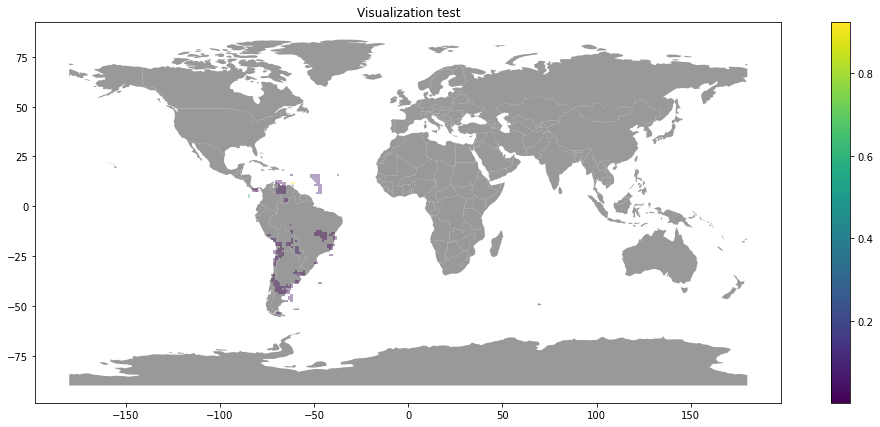

In [9]:
# testing the view
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18, 7))


# ax.set_xlim(178.0, 181.0)
# ax.set_ylim(20.0, 23.0)
world.plot(ax=ax, alpha=0.8, color='grey')

gpd.GeoDataFrame(
  my_merge,
  crs = crs, 
  geometry = [a for a in my_merge['pixel_area']]                                
  ).plot(column='aaod388', ax=ax, legend=True,alpha = 0.4)

plt.title('Visualization test')

In [10]:
# FILE_NAME = '/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/2013/OMI-Aura_L3-OMAERUVd_2013m1221_v003-2017m0821t144348.he5'
# # file_path = '/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/2013/'
# # FILE_NAME = file_path + FILE_NAME

# sd_path = '//HDFEOS/GRIDS/Aerosol_NearUV_Grid/Data_Fields/'
# DATAFIELD_NAME = sd_path + 'FinalAerosolAbsOpticalDepth500'
# print(DATAFIELD_NAME)
# with h5py.File(FILE_NAME, mode='r') as f:
#     # dset = f[DATAFIELD_NAME]
#     dset = f['FinalAerosolAbsOpticalDepth500']
#     data =dset[:].astype(np.float64)

#     # Retrieve any attributes that may be needed later.
#     # String attributes actually come in as the bytes type and should
#     # be decoded to UTF-8 (python3).
#     scale = f[DATAFIELD_NAME].attrs['ScaleFactor']
#     offset = f[DATAFIELD_NAME].attrs['Offset']
#     missing_value = f[DATAFIELD_NAME].attrs['MissingValue']
#     fill_value = f[DATAFIELD_NAME].attrs['_FillValue']
#     title = f[DATAFIELD_NAME].attrs['Title'].decode()
#     units = f[DATAFIELD_NAME].attrs['Units'].decode()

#     # Retrieve the geolocation data.
#     path = '/HDFEOS/SWATHS/ColumnAmountNO2/Geolocation Fields/'
#     latitude = f[path + 'Latitude'][:]
#     longitude = f[path + 'Longitude'][:]

#     data[data == missing_value] = np.nan
#     data[data == fill_value] = np.nan
#     data = scale * (data - offset)
#     datam = np.ma.masked_where(np.isnan(data), data)

#     # # Draw an equidistant cylindrical projection using the low resolution
#     # # coastline database.
#     # m = Basemap(projection='cyl', resolution='l',
#     #             llcrnrlat=-90, urcrnrlat = 90,
#     #             llcrnrlon=-180, urcrnrlon = 180)
#     # m.drawcoastlines(linewidth=0.5)
#     # m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
#     # m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
#     # m.scatter(longitude, latitude, c=datam, s=1, cmap=plt.cm.jet,
#     #          edgecolors=None, linewidth=0)    
#     # cb = m.colorbar()
#     # cb.set_label(units)


#     # basename = os.path.basename(FILE_NAME)
#     # plt.title('{0}\n{1}'.format(basename, title), fontsize=8)
#     # fig = plt.gcf()
#     # pngfile = "{0}.py.png".format(basename)
#     # fig.savefig(pngfile)

Usamos o HARP para importar os dados do OMI e usando um filtro para selecionar os dados

In [11]:
import xarray as xr
import rioxarray as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPolygon


file_name = '/home/mapbiomasar/test.nc'

nc_file = xr.open_dataset(file_name)
nc_file


<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    history:  Mon Jul 18 13:56:02 2022: ncks OMI-Aura_L3-OMAERUVd_2019m1227_v...
    NCO:      netCDF Operators version 5.1.0 (Homepage = http://nco.sf.net, C...

In [12]:
operations_omi = ";".join([
    # "validity !& 1",
    "latitude>39.5",
    "latitude<41",
    "longitude<-2",
    "longitude>-5",
    "keep(latitude_bounds,longitude_bounds,wavelength)",
    "derive(wavelength [])",
    "derive(area {time} [km2])",
])


In [13]:
file_name = '/home/mapbiomasar/MarcoFranco/OMI_Aura/Data_L3/2011/OMI-Aura_L3-OMAERUVd_2011m0107_v003-2017m0821t141110.he5'
product = harp.import_product(file_name)
# # product.aerosol_optical_depth.data
# data = product.aerosol_optical_depth.data
# np.nansum(data)

NameError: name 'harp' is not defined

In [ ]:
file_name = '/home/mapbiomasar/MarcoFranco/OMI_Aura/DATA/2009/206/OMI-Aura_L2-OMAERUV_2009m0725t0020-o26733_v003-2017m0721t201026.he5'
product = harp.import_product(file_name,operations=operations_omi)

# print(product.to_xarray)
# print(product.aerosol_absorbing_optical_depth)
# print(product.aerosol_absorbing_optical_depth.data)
# print(product.aerosol_absorbing_optical_depth.unit)
# print(product.aerosol_absorbing_optical_depth.description)



NoDataError: product contains no variables, or variables without data

### Opcional: Visualização

In [ ]:
# plotting an orbit

# methane
CH4val = product.CH4_column_volume_mixing_ratio_dry_air.data
CH4units = product.CH4_column_volume_mixing_ratio_dry_air.unit
CH4description = product.CH4_column_volume_mixing_ratio_dry_air.description

# aod
AODval = product.aerosol_optical_depth.data
AODunits = product.aerosol_optical_depth.unit
AODdescription = product.aerosol_optical_depth.description

latc=product.latitude.data
lonc=product.longitude.data

colortable=cm.batlow
vmin=0
vmax=0.0001


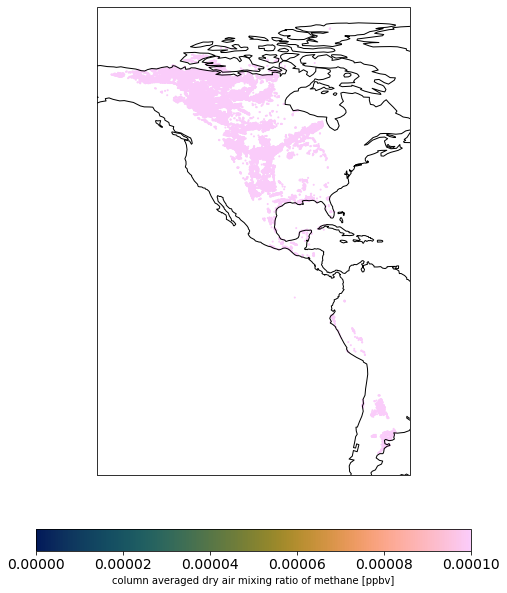

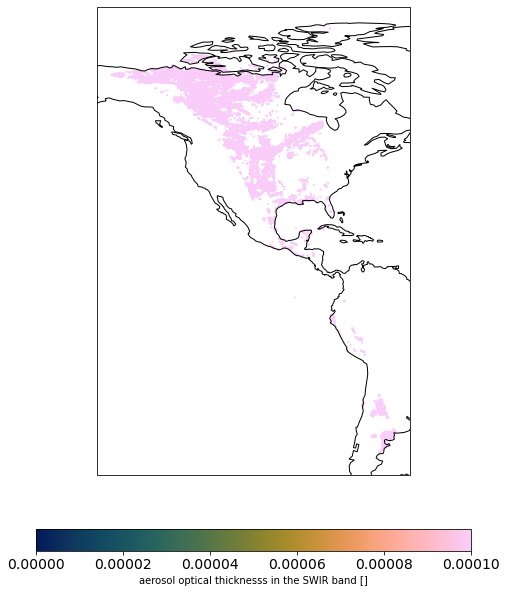

In [ ]:
# simple visualization


def VisData(val,units,desc):

    # TODO: pass units, desc to axis
    fig=plt.figure(figsize=(20, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())


    img = plt.scatter(lonc, latc, c=val,
                    vmin=vmin, vmax=vmax, cmap=colortable, s=1, transform=ccrs.PlateCarree())

    ax.coastlines()

    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(f'{desc} [{units}]')
    cbar.ax.tick_params(labelsize=14)
    plt.show()

VisData(CH4val,CH4units,CH4description)
VisData(AODval,AODunits,AODdescription)

TODO: converter para os Pandas. Salvo engano o grid é 7x 7 graus

In [ ]:

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(xco2['lon'], xco2['lat'])]

points = gpd.GeoDataFrame(xco2, 
                          crs = crs, 
                          geometry = geometry)

points


/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,time,lat,lon,xco2,geometry
0,2003-01-16 12:00:00,-47.5,167.5,0.000373,POINT (167.50000 -47.50000)
1,2003-01-16 12:00:00,-42.5,-67.5,0.000374,POINT (-67.50000 -42.50000)
2,2003-01-16 12:00:00,-42.5,172.5,0.000371,POINT (172.50000 -42.50000)
3,2003-01-16 12:00:00,-37.5,-72.5,0.000375,POINT (-72.50000 -37.50000)
4,2003-01-16 12:00:00,-37.5,-67.5,0.000373,POINT (-67.50000 -37.50000)
...,...,...,...,...,...
121861,2020-06-16 00:00:00,72.5,152.5,0.000409,POINT (152.50000 72.50000)
121862,2020-06-16 00:00:00,77.5,-87.5,0.000411,POINT (-87.50000 77.50000)
121863,2020-06-16 00:00:00,77.5,142.5,0.000407,POINT (142.50000 77.50000)
121864,2020-06-16 00:00:00,82.5,-87.5,0.000412,POINT (-87.50000 82.50000)


In [ ]:
# filter lat and long

# to avoid excessive processing to shapefiles we define a box
# covering South America


min_lat = -57.5858
max_lat =  15.5988
min_lon = -85.8360
max_lon = -35.8750

# back to original nomenclature
tmp = points.copy()

lat_filter = (tmp["lat"] >= min_lat) & (tmp["lat"] <= max_lat)
lon_filter = (tmp["lon"] >= min_lon) & (tmp["lon"] <= max_lon)

# tmp = tmp.loc[lat_filter & lon_filter]

points = tmp[lat_filter & lon_filter]

In [ ]:
# a small subset for testing

points = points[0:1000]

In [ ]:

buffers = points.buffer(2.5) #originally 0.5; is that degrees???
bounds = buffers.bounds

bounds['pixel_area'] = bounds.apply(
  lambda obj: Polygon(shell=[
    Point(obj['maxx'],obj['miny']),
    Point(obj['minx'],obj['miny']),
    Point(obj['minx'],obj['maxy']),
    Point(obj['maxx'],obj['maxy']),
    Point(obj['maxx'],obj['miny']),
  ]),
  axis=1
)

# adding indexes to merge dataframes
points.insert(0, 'New_ID', range(1, 1 + len(points)))
bounds.insert(0, 'New_ID', range(1, 1 + len(bounds)))

my_merge = bounds.merge(points, on='New_ID')


/tmp/ipykernel_129826/641316333.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffers = points.buffer(2.5) #originally 0.5; is that degrees???


In [ ]:
# my_merge

,New_ID,minx,miny,maxx,maxy,pixel_area,time,lat,lon,xco2,geometry
0,1,-70.0,-45.0,-65.0,-40.0,"POLYGON ((-65 -45, -70 -45, -70 -40, -65 -40, ...",2003-01-16 12:00:00,-42.5,-67.5,0.000374,POINT (-67.50000 -42.50000)
1,2,-75.0,-40.0,-70.0,-35.0,"POLYGON ((-70 -40, -75 -40, -75 -35, -70 -35, ...",2003-01-16 12:00:00,-37.5,-72.5,0.000375,POINT (-72.50000 -37.50000)
2,3,-70.0,-40.0,-65.0,-35.0,"POLYGON ((-65 -40, -70 -40, -70 -35, -65 -35, ...",2003-01-16 12:00:00,-37.5,-67.5,0.000373,POINT (-67.50000 -37.50000)
3,4,-65.0,-40.0,-60.0,-35.0,"POLYGON ((-60 -40, -65 -40, -65 -35, -60 -35, ...",2003-01-16 12:00:00,-37.5,-62.5,0.000374,POINT (-62.50000 -37.50000)
4,5,-60.0,-40.0,-55.0,-35.0,"POLYGON ((-55 -40, -60 -40, -60 -35, -55 -35, ...",2003-01-16 12:00:00,-37.5,-57.5,0.000375,POINT (-57.50000 -37.50000)
...,...,...,...,...,...,...,...,...,...,...,...
995,996,-65.0,-40.0,-60.0,-35.0,"POLYGON ((-60 -40, -65 -40, -65 -35, -60 -35, ...",2005-01-16 12:00:00,-37.5,-62.5,0.000377,POINT (-62.50000 -37.50000)
996,997,-60.0,-40.0,-55.0,-35.0,"POLYGON ((-55 -40, -60 -40, -60 -35, -55 -35, ...",2005-01-16 12:00:00,-37.5,-57.5,0.000377,POINT (-57.50000 -37.50000)
997,998,-75.0,-35.0,-70.0,-30.0,"POLYGON ((-70 -35, -75 -35, -75 -30, -70 -30, ...",2005-01-16 12:00:00,-32.5,-72.5,0.000377,POINT (-72.50000 -32.50000)
998,999,-70.0,-35.0,-65.0,-30.0,"POLYGON ((-65 -35, -70 -35, -70 -30, -65 -30, ...",2005-01-16 12:00:00,-32.5,-67.5,0.000376,POINT (-67.50000 -32.50000)


In [ ]:
# new geopandas with the variables of interest
gdf = my_merge.copy()
gdf = gpd.GeoDataFrame(
  gdf,
  crs = crs, 
  geometry = [a for a in gdf['pixel_area']]                               
  )
gdf = gdf.reset_index()
gdf = gdf.loc[:,gdf.columns.isin(['xco2', 'geometry'])]

# print('--> TYPE: ',type(gdf))
gdf


/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,xco2,geometry
0,0.000374,"POLYGON ((-65.00000 -45.00000, -70.00000 -45.0..."
1,0.000375,"POLYGON ((-70.00000 -40.00000, -75.00000 -40.0..."
2,0.000373,"POLYGON ((-65.00000 -40.00000, -70.00000 -40.0..."
3,0.000374,"POLYGON ((-60.00000 -40.00000, -65.00000 -40.0..."
4,0.000375,"POLYGON ((-55.00000 -40.00000, -60.00000 -40.0..."
...,...,...
995,0.000377,"POLYGON ((-60.00000 -40.00000, -65.00000 -40.0..."
996,0.000377,"POLYGON ((-55.00000 -40.00000, -60.00000 -40.0..."
997,0.000377,"POLYGON ((-70.00000 -35.00000, -75.00000 -35.0..."
998,0.000376,"POLYGON ((-65.00000 -35.00000, -70.00000 -35.0..."


/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'xco2 from Mayra')

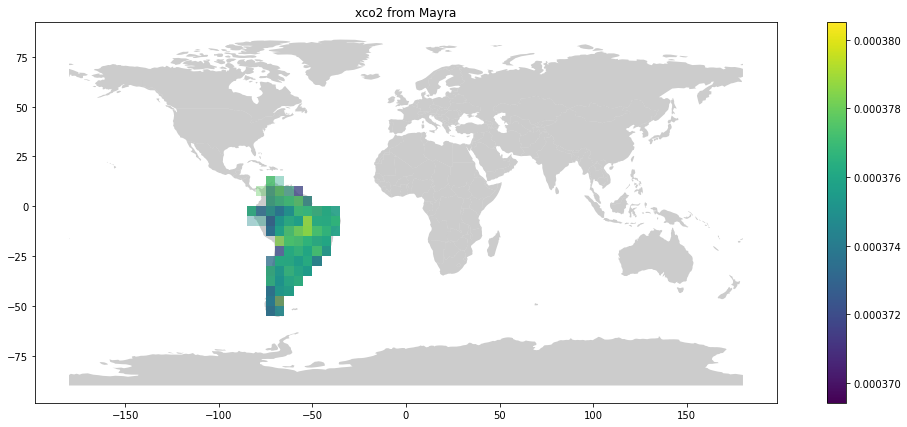

In [ ]:
# testing the view

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18, 7))


# ax.set_xlim(178.0, 181.0)
# ax.set_ylim(20.0, 23.0)
world.plot(ax=ax, alpha=0.4, color='grey')

gpd.GeoDataFrame(
  my_merge,
  crs = crs, 
  geometry = [a for a in my_merge['pixel_area']]                                
  ).plot(column='xco2', ax=ax, legend=True,alpha = 0.4)

# gpd.GeoDataFrame(
#   points,
#   crs = crs, 
#   geometry = [a for a in points['geometry']]                                
#   ).plot(column='xco2', ax=ax)



plt.title('xco2 from Mayra')


In [ ]:

gdf = my_merge.copy()
gdf = gpd.GeoDataFrame(
  gdf,
  crs = crs, 
  geometry = [a for a in gdf['pixel_area']]                               
  )
gdf = gdf.reset_index()
gdf = gdf.loc[:,gdf.columns.isin(['xco2', 'geometry'])]

print('--> TYPE: ',type(gdf))
gdf



--> TYPE:  <class 'geopandas.geodataframe.GeoDataFrame'>


/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,xco2,geometry
0,0.000374,"POLYGON ((-65.00000 -45.00000, -70.00000 -45.0..."
1,0.000375,"POLYGON ((-70.00000 -40.00000, -75.00000 -40.0..."
2,0.000373,"POLYGON ((-65.00000 -40.00000, -70.00000 -40.0..."
3,0.000374,"POLYGON ((-60.00000 -40.00000, -65.00000 -40.0..."
4,0.000375,"POLYGON ((-55.00000 -40.00000, -60.00000 -40.0..."
...,...,...
995,0.000377,"POLYGON ((-60.00000 -40.00000, -65.00000 -40.0..."
996,0.000377,"POLYGON ((-55.00000 -40.00000, -60.00000 -40.0..."
997,0.000377,"POLYGON ((-70.00000 -35.00000, -75.00000 -35.0..."
998,0.000376,"POLYGON ((-65.00000 -35.00000, -70.00000 -35.0..."


In [ ]:
print('--> ',type(gdf))


gdf.to_file('/home/mapbiomasar/MJT/notebooks/smallGridMerged.shp')


-->  <class 'geopandas.geodataframe.GeoDataFrame'>


/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
gpd

<module 'geopandas' from '/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/geopandas/__init__.py'>

### Part 2: reprocessing and splitting files

TODO: separar os arquivos por meses para subir ao GEE



In [ ]:
# summarizing table
print(len(my_merge))
tmp = my_merge.groupby(['lat','lon'])['xco2'].mean()
len(tmp)

11275


147

In [ ]:
tmp.reset_index()


,lat,lon,xco2
0,-57.5,-77.5,0.000402
1,-57.5,-72.5,0.000402
2,-57.5,-67.5,0.000403
3,-57.5,-62.5,0.000403
4,-57.5,-57.5,0.000404
...,...,...,...
142,12.5,-57.5,0.000400
143,12.5,-52.5,0.000400
144,12.5,-47.5,0.000400
145,12.5,-42.5,0.000402
